In [1]:
import pandas as pd
import numpy as np
import pickle
import robot
from da_test_suite_functions import *
import seaborn as sb
import matplotlib.pyplot as plt
from acin_colors import acin_colors
from scipy.spatial.transform import Rotation as R

In [23]:
# import observations from file

# select observations file
observations_file_select = 4
observations_file_str_dict = {1: r'observation_files/obs_exp_26_04_002_2024-04-26-12-06-53_20240426-123809.p',
                              4:  r'observation_files/tu/obs_TU_meas_marker_stopping_20240624-212952.p',
                              5:  r'observation_files/tu/obs_TU_meas_charuco_stopping_20240624-073525.p',
                              6:  r'observation_files/tu/marker_observations_filtered.p',
                              37: r'observation_files/meas_err/observations_simulated_errors__r_0.00070__t_0.00000.p',
                              38: r'observation_files/meas_err/observations_simulated_errors__r_0.00080__t_0.00000.p',
                              60: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00000.p',
                              61: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00010.p',
                              62: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00020.p',
                              63: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00030.p',
                              64: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00040.p',
                              65: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00050.p',
                              66: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00060.p',
                              67: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00070.p',
                              68: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00080.p',
                              69: r'observation_files/meas_err/observations_simulated_errors__r_0.00000__t_0.00090.p',
                              99: r'observations_simulated_20240503_185815.p'}

observations_file = open(observations_file_str_dict[observations_file_select], 'rb')
observations = pickle.load(observations_file)
observations_file.close()
print(observations.keys())

Index(['marker_id', 't', 'mat', 'q', 'interp_dist'], dtype='object')


In [24]:
observations

,marker_id,t,mat,q,interp_dist
0,2,1.715695e+09,"[[-0.9512936351148035, -0.28277262764139194, 0...","[-1.7131477271677436, -0.2941557317112348, -0....",0.000364
1,2,1.715695e+09,"[[-0.9451728075449022, -0.2999974190896414, 0....","[-1.7131844724706902, -0.43056143215007614, -0...",0.000759
2,2,1.715695e+09,"[[-0.971104042692954, -0.1551803741030944, 0.1...","[-1.3733762852735243, -0.42623840367875454, -0...",0.000638
3,2,1.715695e+09,"[[-0.9750464902808451, -0.15140176246755624, 0...","[-1.4337670004387637, -0.494288377784376, -0.4...",0.003295
4,2,1.715695e+09,"[[-0.9671434724624197, -0.2416135148559081, 0....","[-1.5805939728219622, -0.6401157855331534, -0....",0.000703
...,...,...,...,...,...
98,2,1.715697e+09,"[[-0.8795750375338548, -0.2784136869397755, 0....","[-0.0016563179910364337, -0.5142742094106643, ...",0.000289
99,2,1.715697e+09,"[[-0.913459435481313, -0.21636646703484538, 0....","[-0.02212357403448597, -0.5137296069105577, -1...",0.000442
100,2,1.715697e+09,"[[-0.8837890746650914, -0.3566654617300018, 0....","[-0.019331297954857364, -0.32882640809185926, ...",0.000702
101,2,1.715698e+09,"[[-0.908479468775003, -0.2710121926229493, 0.3...","[-0.0231071031968652, -0.3339145215371253, -1....",0.022810


In [60]:
df = pd.DataFrame()
df['marker_id'] = observations['marker_id'].copy()
df['marker_loc'] = get_marker_locations(observations)
df['x'] = [loc[3] for loc in df['marker_loc']]
df['y'] = [loc[4] for loc in df['marker_loc']]
df['z'] = [loc[5] for loc in df['marker_loc']]
df['r1'] = [loc[0] for loc in df['marker_loc']]
df['r2'] = [loc[1] for loc in df['marker_loc']]
df['r3'] = [loc[2] for loc in df['marker_loc']]

# convert to euler
records_euler = df.to_dict('records')
for rec in records_euler:
    r = R.from_rotvec([rec['r1'], rec['r2'], rec['r3']])
    euler = r.as_euler('XYZ')
    rec['a'], rec['b'], rec['c'] = euler[0], euler[1], euler[2]
df = df.from_records(records_euler)

substract_mean = True

list_df = []
for marker_id in set(list(df['marker_id'])):
    x_mean = df[df['marker_id']==marker_id]['x'].to_numpy().mean()
    y_mean = df[df['marker_id']==marker_id]['y'].to_numpy().mean()
    z_mean = df[df['marker_id']==marker_id]['z'].to_numpy().mean()
    a_mean = df[df['marker_id']==marker_id]['a'].to_numpy().mean()
    b_mean = df[df['marker_id']==marker_id]['b'].to_numpy().mean()
    c_mean = df[df['marker_id']==marker_id]['c'].to_numpy().mean()
    r1_mean = df[df['marker_id']==marker_id]['r1'].to_numpy().mean()
    r2_mean = df[df['marker_id']==marker_id]['r2'].to_numpy().mean()
    r3_mean = df[df['marker_id']==marker_id]['r3'].to_numpy().mean()
    df_records = df[df['marker_id']==marker_id].to_dict('records')
    for rec in df_records:
        if substract_mean:
            rec['marker_id'] = marker_id
            rec['x'] = rec['x']-x_mean
            rec['y'] = rec['y']-y_mean
            rec['z'] = rec['z']-z_mean
            rec['a'] = rec['a']-a_mean
            rec['b'] = rec['b']-b_mean
            rec['c'] = rec['c']-c_mean
            rec['r1'] = rec['r1']-r1_mean
            rec['r2'] = rec['r2']-r2_mean
            rec['r3'] = rec['r3']-r3_mean
        list_df.append(rec)


df_records = pd.DataFrame.from_records(list_df)

In [61]:
df_records

,marker_id,marker_loc,x,y,z,r1,r2,r3,a,b,c
0,2,"[-0.04679537369196902, 1.5338154427500599, 0.0...",-0.002590,-0.001352,-0.004853,-0.000529,-0.022247,-0.006957,0.339262,-0.003707,-0.344042
1,2,"[-0.048765632004419975, 1.551394389054893, 0.0...",-0.004065,0.000470,-0.002085,-0.002499,-0.004668,-0.006857,0.083233,0.002805,-0.089200
2,2,"[-0.04237449662732517, 1.5337538462353788, 0.0...",-0.004165,-0.002729,-0.004417,0.003892,-0.022309,-0.003012,0.345205,-0.003487,-0.344631
3,2,"[-0.04409759973926569, 1.5297384327032686, 0.0...",-0.004480,-0.003717,-0.004641,0.002169,-0.026324,-0.007124,0.404758,-0.004548,-0.407919
4,2,"[-0.06410807011419212, 1.5409469666361242, 0.0...",-0.005760,-0.000514,-0.001493,-0.017842,-0.015116,-0.025323,0.238211,0.000545,-0.265801
...,...,...,...,...,...,...,...,...,...,...,...
98,3,"[-0.11915957950426603, 1.5474874899832047, 0.1...",-0.006406,-0.003981,-0.000665,0.014633,-0.013626,0.017188,0.096105,-0.002802,-0.075776
99,3,"[-0.1294370199291611, 1.5560200950052772, 0.12...",-0.006939,0.001504,-0.000044,0.004355,-0.005093,0.012717,0.035306,-0.005466,-0.024410
100,3,"[-0.1317817692900257, 1.5582394155825263, 0.11...",-0.006218,0.002790,-0.002125,0.002011,-0.002874,0.006864,0.020355,-0.003053,-0.014695
101,3,"[-0.11709885948259033, 1.5687752335644054, 0.1...",0.000893,0.001897,0.001728,0.016693,0.007662,0.015211,-0.037514,0.001451,0.057878


In [62]:
mid = df_records['marker_id'].to_numpy()
x, y, z = df_records['x'].to_numpy(), df_records['y'].to_numpy(), df_records['z'].to_numpy()
a, b, c = df_records['a'].to_numpy(), df_records['b'].to_numpy(), df_records['c'].to_numpy()
r1, r2, r3 = df_records['r1'].to_numpy(), df_records['r2'].to_numpy(), df_records['r3'].to_numpy()

std_x = 0.004892
std_y = 0.002248
std_z = 0.005078


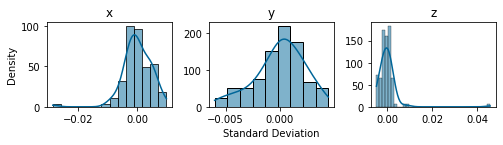

In [63]:
width = 18/2.54
fig, axs = plt.subplots(1,3, figsize=(width, 0.3*width))

sb.histplot(x, kde=True, stat="density", color=acin_colors['blue'], ax=axs[0])
axs[0].set_title('x')


sb.histplot(y, kde=True, stat="density", color=acin_colors['blue'], ax=axs[1])
axs[1].set_title('y')
axs[1].set_ylabel('')
axs[1].set_xlabel('Standard Deviation')

sb.histplot(z, kde=True, stat="density", color=acin_colors['blue'], ax=axs[2])
axs[2].set_title('z')
axs[2].set_ylabel('')

plt.tight_layout()

if False:
    lim = 2e-2
    axs[0].set_xlim([-lim, lim])
    axs[1].set_xlim([-lim, lim])
    axs[2].set_xlim([-lim, lim])

for coor in ['x', 'y', 'z']:
    std = np.std(df_records[coor])
    print(f"std_{coor} = {std:.6f}")

if False:
    plt.savefig(f'error_in_observations_{observations_file_select}.pdf', format='pdf', bbox_inches='tight')

In [64]:
mid

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [65]:
def get_acin_color(i):
    collist = list(acin_colors.keys())
    colname = collist[int(i)]
    return acin_colors[colname]

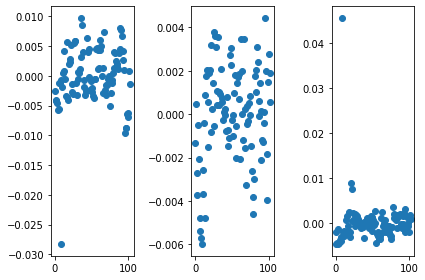

In [66]:
fig, axs = plt.subplots(1,3)
for i,j in zip([x,y,z],[0,1,2]):
    axs[j].scatter(np.arange(len(i)), i)

fig.tight_layout()

std_a = 0.165777
std_b = 0.003511
std_c = 0.167945


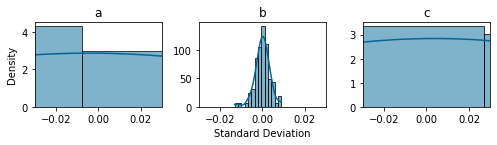

In [9]:
fig, axs = plt.subplots(1,3, figsize=(width, 0.3*width))

sb.histplot(a, kde=True, stat="density", color=acin_colors['blue'], ax=axs[0])
axs[0].set_title('a')

sb.histplot(b, kde=True, stat="density", color=acin_colors['blue'], ax=axs[1])
axs[1].set_title('b')
axs[1].set_ylabel('')
axs[1].set_xlabel('Standard Deviation')

sb.histplot(c, kde=True, stat="density", color=acin_colors['blue'], ax=axs[2])
axs[2].set_title('c')
axs[2].set_ylabel('')

plt.tight_layout()


if True:
    lim = 3e-2
    axs[0].set_xlim([-lim, lim])
    axs[1].set_xlim([-lim, lim])
    axs[2].set_xlim([-lim, lim])

for coor in ['a', 'b', 'c']:
    std = np.std(df_records[coor])
    print(f"std_{coor} = {std:.6f}")
    
if False:
    plt.savefig(f'error_in_observations_{observations_file_select}.pdf', format='pdf', bbox_inches='tight')

std_r1 = 0.008062
std_r2 = 0.011742
std_r3 = 0.009908


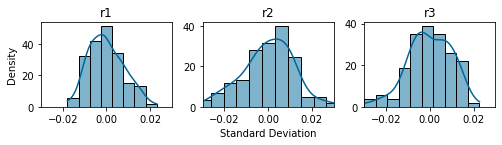

In [10]:
fig, axs = plt.subplots(1,3, figsize=(width, 0.3*width))

sb.histplot(r1, kde=True, stat="density", color=acin_colors['blue'], ax=axs[0])
axs[0].set_title('r1')

sb.histplot(r2, kde=True, stat="density", color=acin_colors['blue'], ax=axs[1])
axs[1].set_title('r2')
axs[1].set_ylabel('')
axs[1].set_xlabel('Standard Deviation')

sb.histplot(r3, kde=True, stat="density", color=acin_colors['blue'], ax=axs[2])
axs[2].set_title('r3')
axs[2].set_ylabel('')

plt.tight_layout()


if True:
    lim = 3e-2
    axs[0].set_xlim([-lim, lim])
    axs[1].set_xlim([-lim, lim])
    axs[2].set_xlim([-lim, lim])

for coor in ['r1', 'r2', 'r3']:
    std = np.std(df_records[coor])
    print(f"std_{coor} = {std:.6f}")
    
if False:
    plt.savefig(f'error_in_observations_{observations_file_select}.pdf', format='pdf', bbox_inches='tight')